<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's


#### Over view of the data and its summary statistics ####

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


No missing values no categorical values to change for dummies 




In [9]:
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


basic overview with MEDV as Y strong negative correlation with LSTAT and similar positive with RM no others exceeding .5

In [13]:
boston_df.head(4)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4


seems Unnamed:0 is an index copy.

In [23]:
boston_df.rename(columns={'Unnamed: 0': ' '},inplace=True)
boston_df.set_index(' ',inplace=True)

In [24]:
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


## Task 2 ##

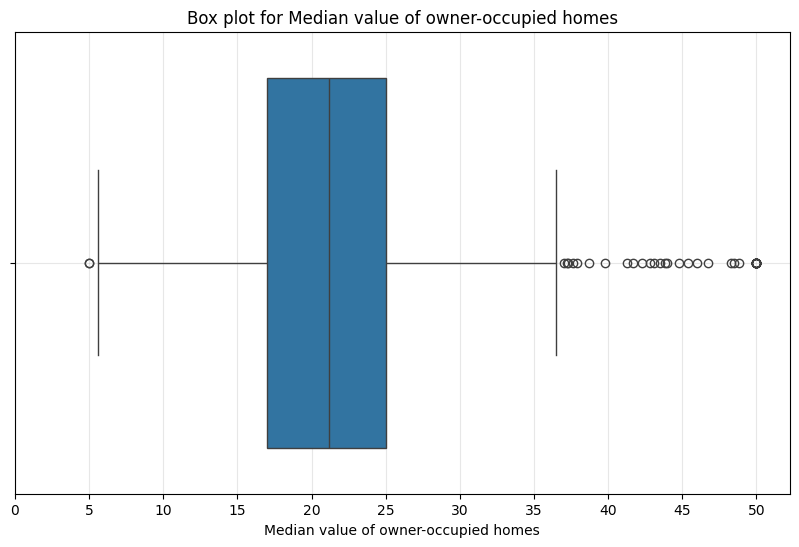

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(boston_df,x='MEDV')
plt.xticks(range(0,55,5))
plt.title('Box plot for Median value of owner-occupied homes')
plt.xlabel('Median value of owner-occupied homes')
plt.grid(alpha=.3)
plt.show()

Most values fall with in the 6 to 36 range with more outliers in the high numbers

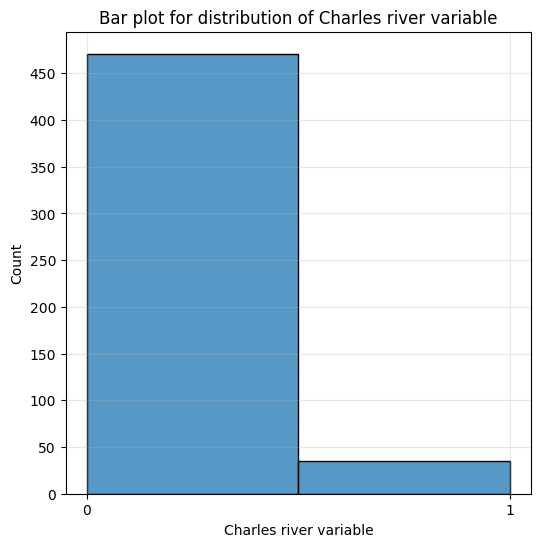

In [53]:
plt.figure(figsize=(6,6))
sns.histplot(x=boston_df['CHAS'].astype(int),bins=2)
plt.xticks(range(0,2))
plt.title('Bar plot for distribution of Charles river variable')
plt.xlabel('Charles river variable')
plt.yticks(range(0,500,50))
plt.grid(alpha=.3)
plt.show()

Most of the Charles river variable are 0, doesn't bound the Charles river, with only about 40 bounding the Charles river.

In [144]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


In [152]:
boston_df.age_group.value_counts()

age_group
70 and older         287
between 35 and 70    128
35 and younger        91
Name: count, dtype: int64

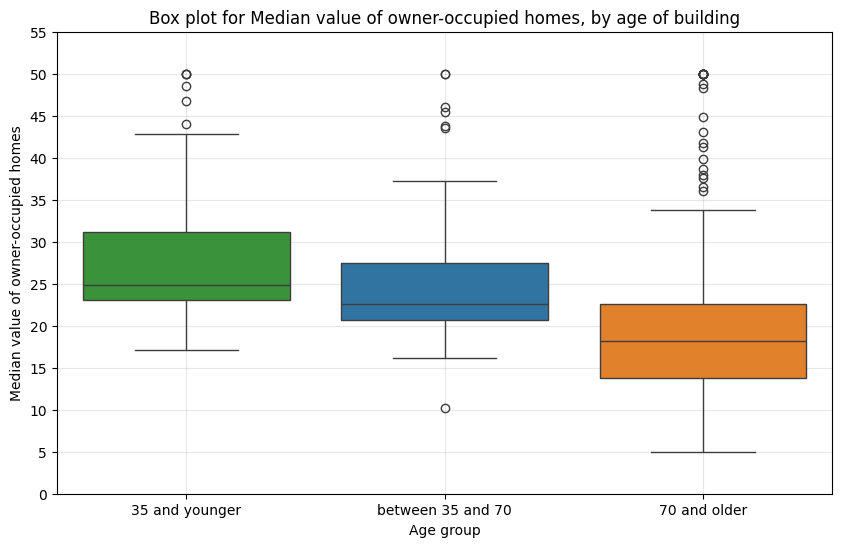

In [167]:
plt.figure(figsize=(10,6))
sns.boxplot(x=boston_df['age_group'],y=boston_df['MEDV'],hue=boston_df['age_group'],order=['35 and younger','between 35 and 70','70 and older'])
plt.title('Box plot for Median value of owner-occupied homes, by age of building')
plt.ylabel('Median value of owner-occupied homes')
plt.xlabel('Age group')
plt.grid(alpha=.3)
plt.yticks(range(0,60,5))
plt.show()

It seems that 35 and younger have the highest medain value, and 70 and older have the largest range of values. This shows newer houses have on average a higher value than there older counter parts.

In [170]:
boston_df.NOX

 
0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

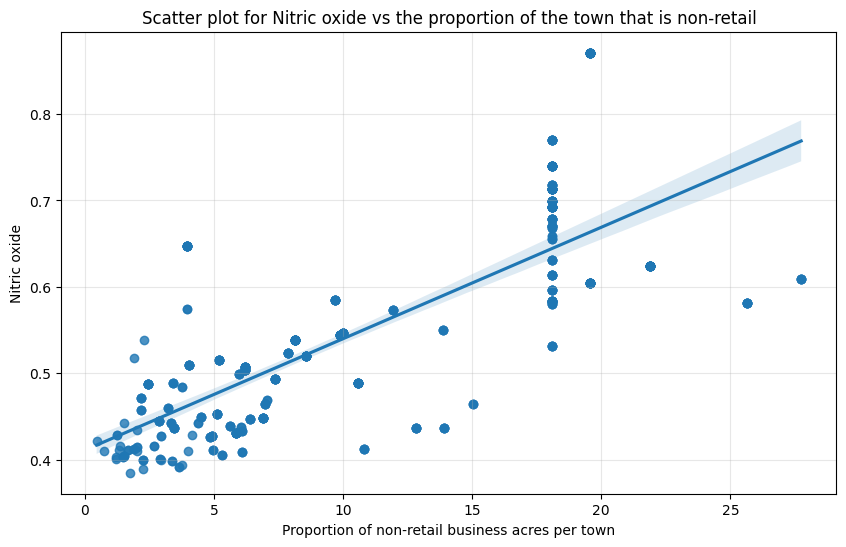

In [182]:
plt.figure(figsize=(10,6))
sns.regplot(boston_df,x='INDUS' ,y='NOX')
plt.grid(alpha=.3)
plt.title('Scatter plot for Nitric oxide vs the proportion of the town that is non-retail')
plt.ylabel('Nitric oxide')
plt.xlabel('Proportion of non-retail business acres per town')
plt.show()

In [180]:
boston_df[['NOX','INDUS']].corr()

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


Going by the scatter plot and correlation matrix above there is a high correlation between the Nitric oxide levels and the proportion of the town that is non-retail.

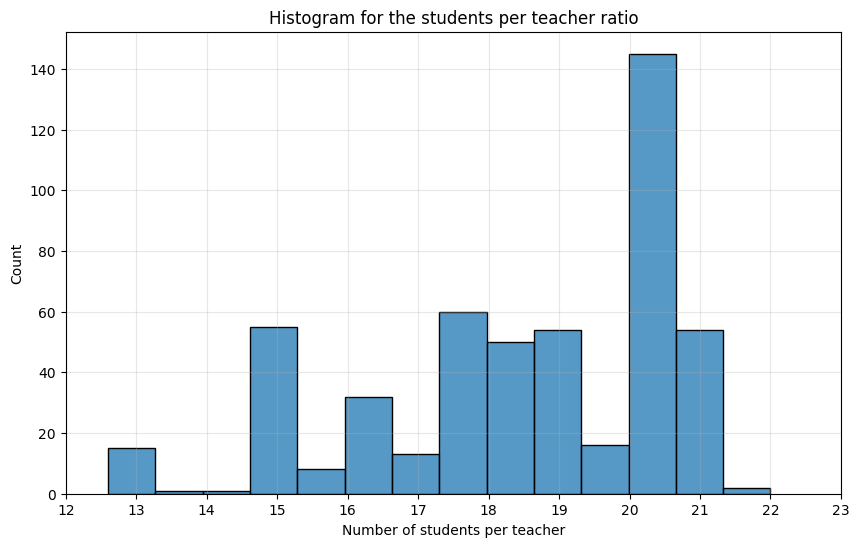

In [191]:
plt.figure(figsize=(10,6))
sns.histplot(boston_df['PTRATIO'])
plt.grid(alpha=.3)
plt.title('Histogram for the students per teacher ratio')
plt.xticks(range(12,24,1))
plt.ylabel('Count')
plt.xlabel('Number of students per teacher')
plt.show()

Most of the cases are 20 or 21 to 1 as a ratio

## Task 3 ##

### Question ###
Is there a significant difference in the median value of houses bounded by the Charles river or not?

H0 there isn’t a notable difference in median value between the houses bounded by the Charles river and those not.

H1 the median value between the houses bounded by the Charles river is either higher or lower than those not bounded by it.

To determine this I'll use a t-text with an alpha of 0.05


In [196]:
# t test to determine the answer
x = boston_df['CHAS']
y = boston_df['MEDV']
scipy.stats.ttest_ind(x,y)

TtestResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305, df=1010.0)

As the P-value is smaller than the alpha we can reject the H0 (null hypothesis) and say there is a statistical difference between those bounded by the charles river.
### Answer ###
#### Yes there is a difference in median ####

### Question 2 ###

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

H0 there isn’t a notable difference in median values between the houses sorting by proportion of owner-occupied units, built before 1940.

H1 the median values differ between the houses built before 1940, sorted by proportion of owner-occupied units.

Still using an alpah of 0.05.
I'll perform a ANOVA test

In [211]:
first_age_group = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
second_age_group = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
thrid_age_group = boston_df[boston_df['age_group'] == '70 and older']['MEDV']
scipy.stats.f_oneway(first_age_group,second_age_group,thrid_age_group)


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

As the p value is smaller than the alpha we can reject H0 (null hypothesis) and say that there is a statistical difference between the three groups. Further analysis required to determine details.
### Answer ###
#### Yes there is a difference, I would recomend looking into it further ####

### Question 3 ###

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

H0 there is no relationship between Nitric oxide concentration and proportion of non-retail business acres per town.

H1 there is either a positive or negative relationship between Nitric oxide concentration and proportion of non-retail business acres per town.

Still using alpha of 0.05. I'll perform a persons correlation test.

In [213]:
x = boston_df['NOX']
y = boston_df['INDUS']
scipy.stats.pearsonr(x,y)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

As the p-value is smaller than the alpha we can reject H0 (null hypothesis) and say that there is a correlation between the two, in this case a positive one.
### Answer ###
#### No we cant, there does seem to be a positive coerrelation between the two ####

### Question 4 ###
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

H0 there’s no impact between median value of owner-occupied homes with additional weighted distance and those without.

H1 there is a positive impact to the median value of owner-occupied home caused by additional weighted distance.

H2 there is a neagtive impact to the median value of owner-occupied home caused by additional weighted distance.

Still using alpha of 0.05, I will perform a regession analysis


In [216]:
x= boston_df['DIS']
y= boston_df['MEDV']
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        15:00:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the p-value (noted as P>|t|) for DIS is less than the alpah of 0.05 we can say that there is a correlation, in this case the Coefficient shows it is a positive one, so we go with H1.
### Answer ###
#### The impact of additional weighted distance to the five Boston employment centres, is an increase in Median value of the house ####